In [119]:
car_img="car1.jpeg"

In [120]:
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt
import cv2

In [121]:
def read_img(path, grayscale=True):
    img=cv2.imread(path)
    if grayscale:
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        plt.imshow(img, cmap="gray")
        return img
    color_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(color_img)
    return color_img

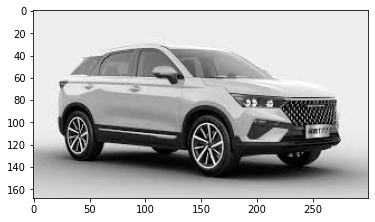

In [122]:
car=read_img(car_img)

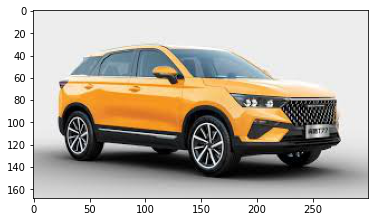

In [123]:
color_car=read_img(car_img, grayscale=False)

In [124]:
car.shape

(168, 300)

In [125]:
row, col=car.shape
car_reshape=car.reshape(1,row,col,1)
car_reshape.shape

(1, 168, 300, 1)

In [126]:
color_car.shape

(168, 300, 3)

In [127]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1, 
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 input_shape=car_reshape.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [128]:
out=conv_model.predict(car_reshape)

In [129]:
out.shape

(1, 166, 298, 1)

In [130]:
(168-3+0)//1 +1

166

In [131]:
(300-3+0)//1 +1

298

In [132]:
#plt.imshow(out, cmap="gray")

In [133]:
row, col=out.shape[1:-1]
reshape_out=out.reshape(row,col)

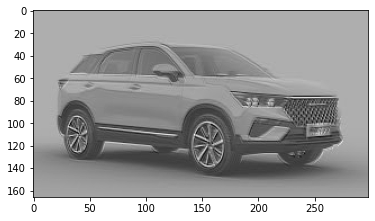

In [134]:
plt.imshow(reshape_out, cmap="gray")

# Color Images

In [135]:
row, col, depth=color_car.shape
color_car1=color_car.reshape(1, row,col, depth)
color_car1.shape

(1, 168, 300, 3)

In [136]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1, 
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car1.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [137]:
3*3*3 +1

28

In [138]:
out_color=conv_model.predict(color_car1)
#row,col=out_color.shape
#out_color_reshape=out_color.reshape(row,col)

In [139]:
out_color.shape

(1, 166, 298, 1)

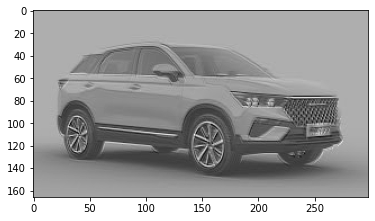

In [140]:
plt.imshow(reshape_out, cmap="gray")

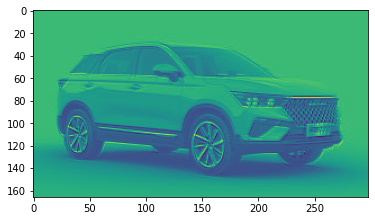

In [141]:
plt.imshow(reshape_out)

In [142]:
reshape_out.shape

(166, 298)

# Display 5 different filters

In [143]:
def reshaping_in(img, grayscale=True):
    if grayscale:
        row,col=img.shape
        img=img.reshape(1,row,col,1)
        return img
    row,col,depth=img.shape
    color_img=img.reshape(1,row,col,depth)
    return color_img
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
    CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters, kernel_size=filter_size, strides=strides, input_shape=input_shape, padding=padding)]
    conv_model=tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model
def apply_conv_model_visualize(img, conv_model):
    try:
        out=conv_model.predict(img)
        out.shape
        row,col,depth=out.shape[1:]
        
        reshape_out=out.reshape(row,col,depth)
        #fig, ax=plt.subplots(1,5,figsize=(10,10))
        for d in range(depth):
            plt.imshow(reshape_out[:,:,d], cmap="gray")
        
        #plt.imshow(reshape_out, cmap="gray")
            plt.show()
    except Exception as e:
        raise e
    

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


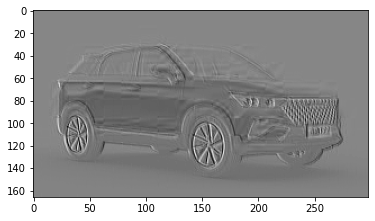

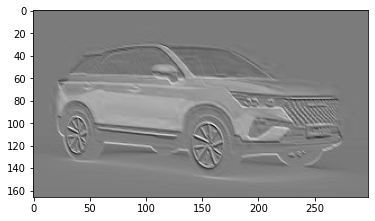

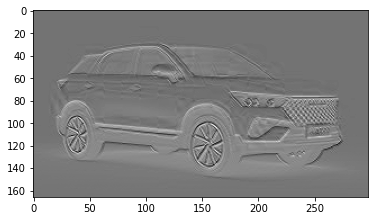

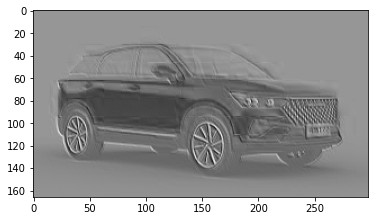

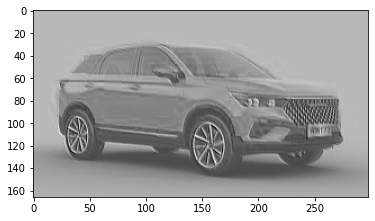

In [144]:
img=read_img(car_img, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=5, filter_size=(3,3),strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_visualize(input_img, model)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 168, 300, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


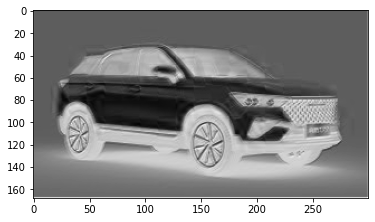

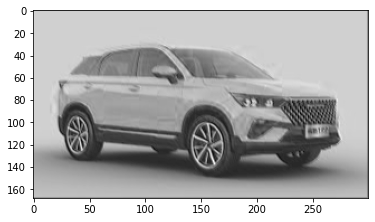

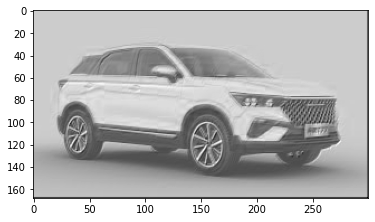

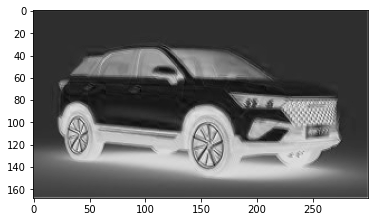

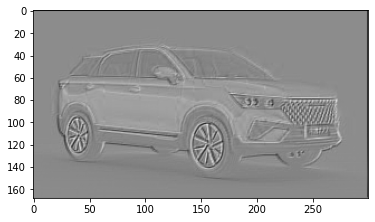

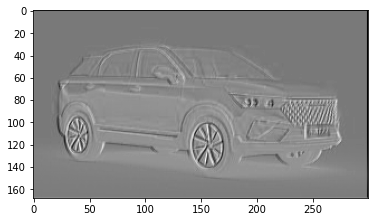

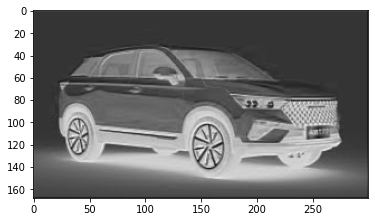

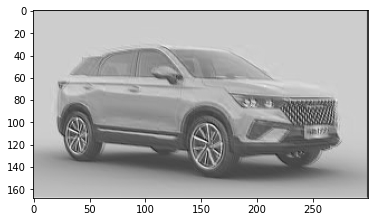

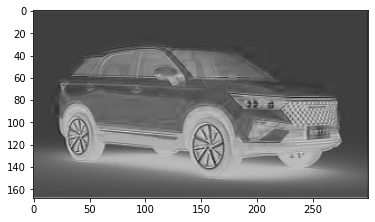

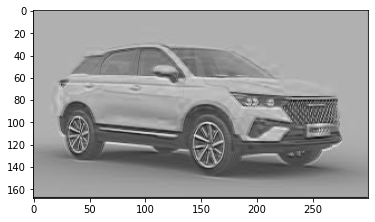

In [145]:
img=read_img(car_img, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=10, filter_size=(3,3),strides=(1,1), input_shape=input_img.shape[1:], padding="same")
apply_conv_model_visualize(input_img, model)

In [146]:

def max_pooling(img,pool_size=(2,2),strides=(2,2)):
    reshaped_img=reshaping_in(img)
    pooling_layer=tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
    result=pooling_layer(reshaped_img)
    return result
    

(168, 300)


TensorShape([1, 84, 150, 1])

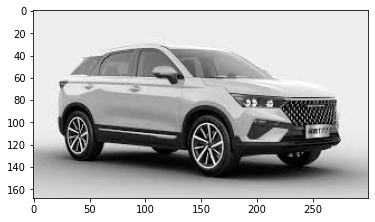

In [147]:
img=read_img(car_img)
print(img.shape)
result=max_pooling(img)
result.shape

In [148]:
def plot_pooling(result):
    _,row,col,_=result.shape
    reshape=tf.reshape(result, (row,col))
    plt.imshow(reshape, cmap="gray")

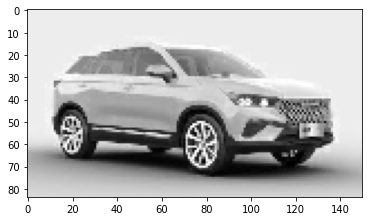

In [149]:
plot_pooling(result)

In [150]:
_,row,col,_=result.shape
reshape=tf.reshape(result,(row,col))

In [151]:
result=max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


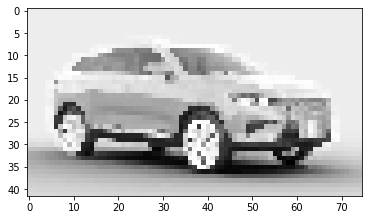

In [152]:
plot_pooling(result)

 # Average Pooling

In [155]:
def global_avg_pooling(img):
    reshaped_img=reshaping_in(img)
    pooling_layer=tf.keras.layers.GlobalAvgPool2D()
    result=pooling_layer(reshaped_img)
    return result

(168, 300)
(1, 1)
tf.Tensor([[167]], shape=(1, 1), dtype=uint8)


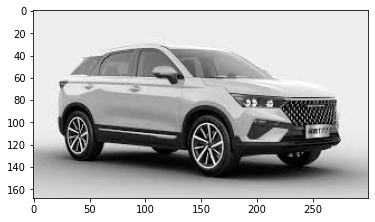

In [158]:
img=read_img(car_img)
print(img.shape)
result=global_avg_pooling(img)
print(result.shape)
print(result)